In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
heart  = pd.read_csv('heart.csv')

In [73]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
import numpy as np
bins = [0, 20,40,60,70, np.inf]
names = ['<20','20-40', '40-60','60-70', '70+']

heart['age_range'] = pd.cut(heart['age'], bins, labels=names)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,20-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-60
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-60


In [75]:
heart['age_range'].value_counts()

40-60    205
60-70     73
20-40     19
70+        6
<20        0
Name: age_range, dtype: int64

In [76]:
age_cat = []
def generate_age_cat(heart, age_cat):
    for index, row in heart.iterrows():
        if row.age<20:
            age_cat.append('teen')
        elif row.age in range (20, 40):
            age_cat.append('youth')
        elif row.age in range (40, 60):
            age_cat.append('up youth')
        else:
            age_cat.append('aged')
    return age_cat
        
heart['agecat'] = generate_age_cat(heart, age_cat)
heart[['agecat']].head()

,agecat
0,aged
1,youth
2,up youth
3,up youth
4,up youth


In [77]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,agecat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-70,aged
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,20-40,youth
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-60,up youth
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-60,up youth
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-60,up youth


In [78]:
heart.groupby('agecat').max()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range
agecat,,,,,,,,,,,,,,,
aged,77,1,3,180,564,1,2,179,1,6.2,2,3,3,1,70+
up youth,59,1,3,200,409,1,2,195,1,5.6,2,4,3,1,40-60
youth,39,1,3,140,321,0,1,202,1,3.8,2,4,3,1,20-40


In [79]:
heart.groupby('agecat').min()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range
agecat,,,,,,,,,,,,,,,
aged,60,0,0,100,149,0,0,71,0,0.0,0,0,1,0,40-60
up youth,40,0,0,94,126,0,0,88,0,0.0,0,0,0,0,20-40
youth,29,0,0,94,175,0,0,130,0,0.0,0,0,2,0,20-40


In [80]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [81]:
heart.groupby('sex').max()


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,agecat
sex,,,,,,,,,,,,,,,
0,76,3,200,564,1,2,192,1,6.2,2,3,3,1,70+,youth
1,77,3,192,353,1,2,202,1,5.6,2,4,3,1,70+,youth


In [82]:
males = pd.DataFrame(heart[heart.sex ==1])

In [83]:
type(males)

pandas.core.frame.DataFrame

In [84]:
females = pd.DataFrame(heart[heart.sex==0])

In [85]:
type(females)

pandas.core.frame.DataFrame

In [86]:
males.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,agecat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-70,aged
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,20-40,youth
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-60,up youth
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,40-60,up youth
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,40-60,up youth


In [87]:
females.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,agecat
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-60,up youth
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-60,up youth
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,40-60,up youth
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1,40-60,up youth
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1,40-60,up youth


In [88]:
males[['age','cp']].corr()

,age,cp
age,1.000000,-0.094101
cp,-0.094101,1.000000


In [89]:
females[['age','cp']].corr()

,age,cp
age,1.000000,-0.029575
cp,-0.029575,1.000000


/Users/Joshua/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


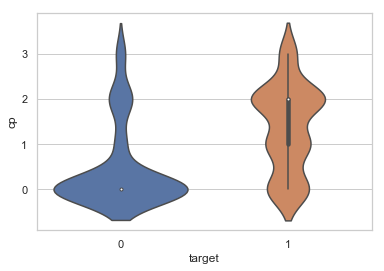

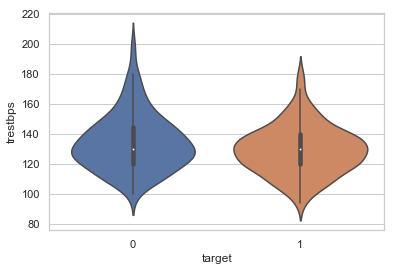

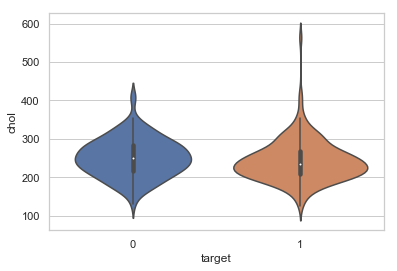

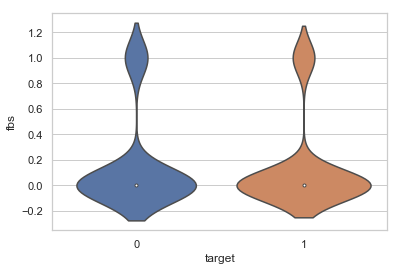

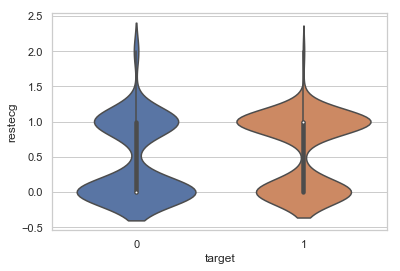

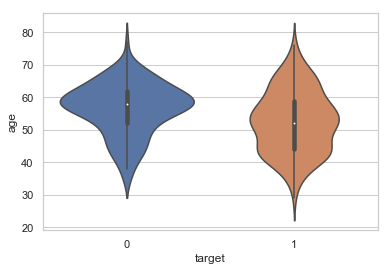

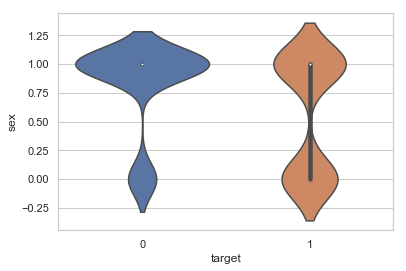

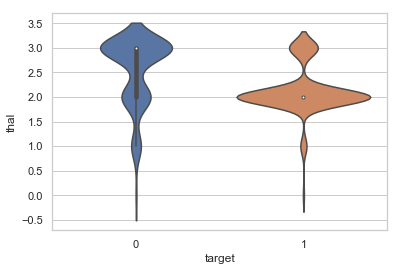

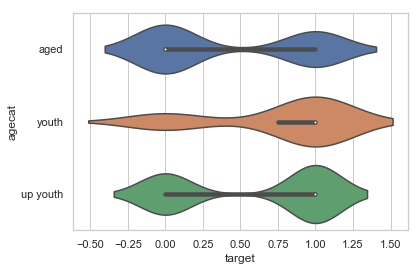

In [90]:
def plot_box(heart, cols, col_x = 'target'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=heart)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['cp', 'trestbps', 'chol','fbs','restecg',
            'age', 'sex', 'thal','agecat']
plot_box(heart, num_cols)

In [91]:
#The violin plot has a few details to consider
#1. Chest pain was high with persons with heart disease compared with those without heart disease
#2. Resting blood pressure showed no significant variation for target 0 or 1
#3. serum cholesterol was a bit higher in those without heart disease than those with heart disease but the difference is only marginal


In [92]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [93]:
heart_yes = pd.DataFrame(heart[heart.target == 1])

In [94]:
heart_no = pd.DataFrame(heart[heart.target == 0])

In [95]:
heart_yes.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,agecat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-70,aged
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,20-40,youth
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-60,up youth
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-60,up youth
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-60,up youth


In [96]:
clear

/Users/Joshua/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


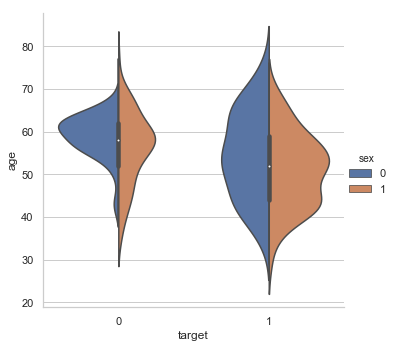

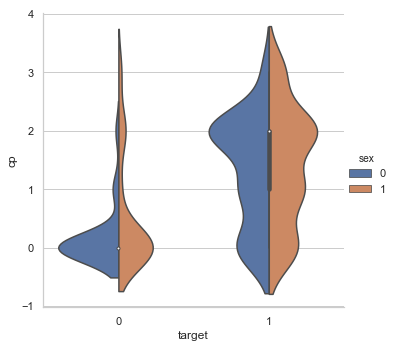

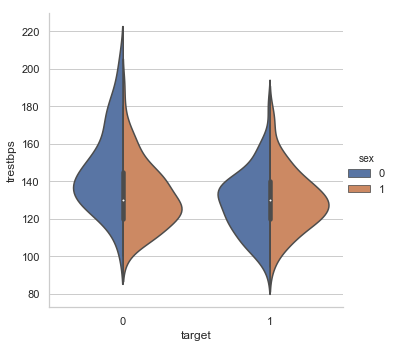

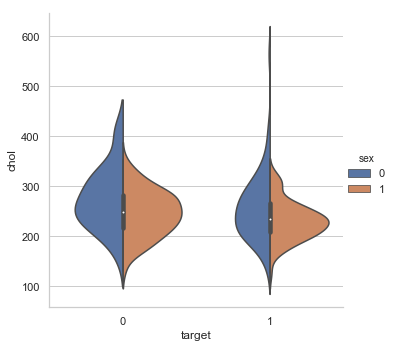

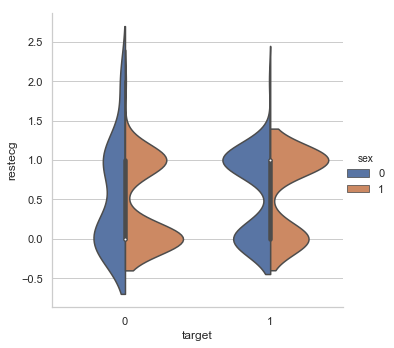

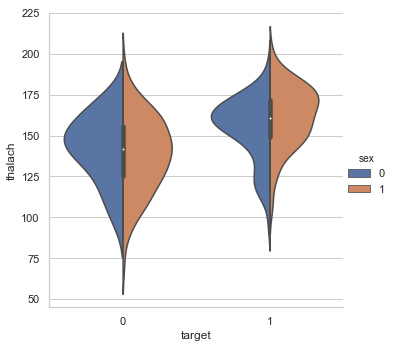

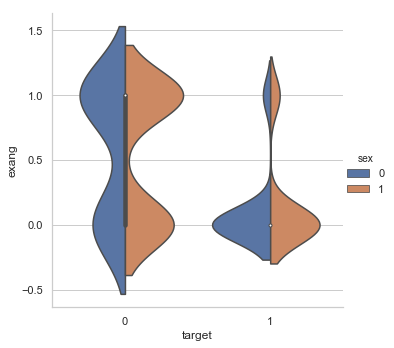

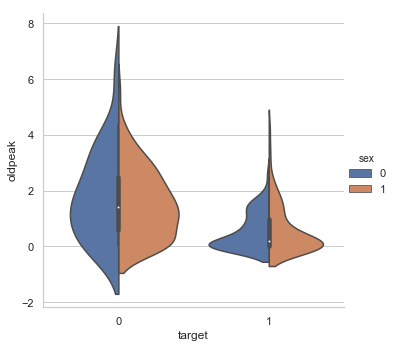

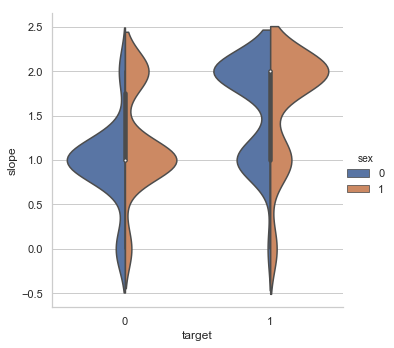

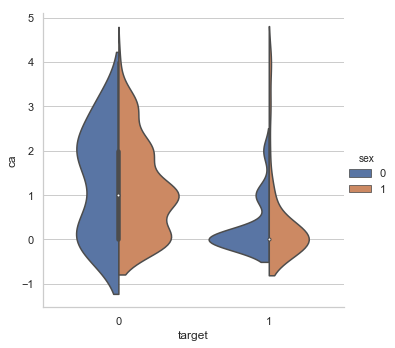

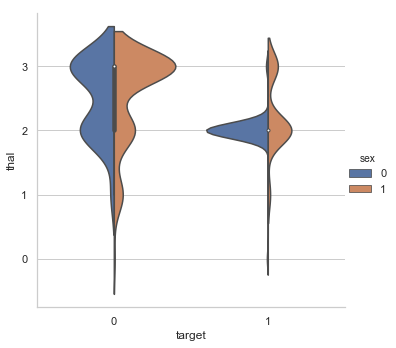

In [97]:
def cat_plot(heart, cols, col_x = 'target'):
    for col in cols:
        sns.catplot(col_x, col, data=heart, kind='violin', split=True, hue='sex')
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

y = ['age', 'cp', 'trestbps','chol','restecg',
            'thalach', 'exang', 'oldpeak','slope','ca','thal']
cat_plot(heart, y)


Explanations to the split violin plots
Explanations to the split violin plots

1. Age
The data shows that age group between 40 to 58 years has the highest frequency in relation to patients with heart disease with men dominating. Also, patients without heart diesease are in the aged mostly between 58- 70 + years with women having the majority of the population. This means, men are more prone to having heart disease between the age of 40 - 60 years. Even with class imbalance, women have a higher chance of not contracting heart disease compared to men in the same age range.

2. Chest pain
Clearly, those with type 2 chest pain have the highest frequency for those with heart disease with type 3 being the minimal but in this case, women have the highest frequency for those with type 2 chest pain and with heart disease. Type 1 chest pain also has some likelyhood but type zero type in most present in women with no heart disease.

3. Resting blood pressure
Not much difference in the median for persons with heart disease and those who don't have. the graph looks identical with men having the most frequency in both cases.
    
4. Serum cholesterol
The analysis is no different from resting blood pressure. No much difference between the median and the shape of the two plots. This suggests the level of serum cholestrol doesn't give any significant information as to whether a patient is likely to contract cardiovascular disease with this type of cholestrol present.
    
5. fbs (fasting blood pressure)
In the first violin plot, fbs was identical to both targets meaning fbs doesn't give a significant meaning to a person having a cardiovascular disease or not because. However, in the split violin plot, we see some kind of distribution between men and women in both target cases. There're only few cases of persons with fbs > 120 mg/dl but false in most cases. 
    
6. Resting electrographic results
The plot display persons with heart disease have ST-T wave abnormality and majority of men have it. We have rare cases of persons showing definite left ventricular hypertrophy. The  restecg is practically normal for those with no heart disease present and majority of women have this type.
    
7. thalach (Maximum Heart rate achieved)
Generally, the range of thalach for persons with some cardiovascular disease is between 150 and 175 with woman dominating. 

8. Exercise induced angina
This variable is mostly 'no' for people with heart disease and women have a higher width compared to that of men. Men seem to lead in both cases of yes and no for those without heart disease.
    
9. Old peak (ST depression induced by exercise relative to rest)
Old peak widens at the base where old peak=0 and narrows to the neck where old peak = 2 for those with heart disease with a few outliers. for target 0, the width is larger than those of target one but largely doesn't sit at the base (where old peak = 0) as compared to target 1. We can thus conclude that, both men and women with relatively zero ST depression induced by exercise relative to rest have a higher chance on contracting a cardiovascular disease.

10. Slope 
Clearly slope of peak ST exercise is around 2.0 for people with heart disease. There is not much variation between both sexes and same can be said for persons without heart disease but with slope around 1.0. Slope of 2.0 can be considered an indication of a person having a chance of cardiovascular disease. 
    
11. ca (Number of major vessels (0-3))
The median ca for people with cardiovascular disease is zero and have very little of the other major blood vessels.Those without cardiovascular disease have a good number major of blood vessels. This indicates that persons who have higher number of major blood vessels stand a good chance of not having cardiovascular disease. 
    
12. thal (3=normal, 6= fixed effect, 7= reversal defect)
It's a really funny graph because most people without cardiovascular disease have a normal thal but evidently, those with heart disease have what i will describe as subnormal thal (of 2) and women have a greater share of the number almost 2 and half times the number of men in that category. 
    
General observation
To have a good chance of not contracting a heart disease, the following is essential:
Must be between the ages of 55 to 65, have type zero chest pain, have normal electrographic result, exhibit a lower maximum heart rate, have exercise induced angina, must have a higher than zero ST depression induced by exercise relative to rest, have a slope of peak ST exercise of 1.0 and below 2.0, should carry more than one major vessels and have a normal thal. The trend indicates men have a like chance of contracting cardiovascular disease compared to men from the data. 



In [98]:
# start building the machine learning model
#Lets start with fearture selection or which determinant most impacts heart disease

In [99]:
heart_use = heart.drop(['age_range','agecat'],axis=1)

In [100]:
heart_use.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
features = heart_use.drop('target', axis=1) #.values ensure the data is converted to arrays
label = heart_use['target']
type(features) , type(label)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [102]:
features.shape , label.shape

((303, 13), (303,))

In [103]:
X = np.array(features)
y = np.array(label)

In [104]:
X.shape, y.shape

((303, 13), (303,))

In [105]:
#trying out with Lasso regression

In [106]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)
#clearly Lasso regression is not good for this data

-0.00019780713560102467

In [107]:
#Logistic regression
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy.random as nr

logistic_mod = linear_model.LogisticRegression(class_weight = "balanced")
#performing logistic regression
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(3456)
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(X, y)
clf.best_estimator_.C

10

In [108]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, features, label, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.898
SDT of the metric       = 0.049
Outcomes by cv fold
Fold  1    0.941
Fold  2    0.889
Fold  3    0.870
Fold  4    0.942
Fold  5    0.903
Fold  6    0.852
Fold  7    0.931
Fold  8    0.982
Fold  9    0.857
Fold 10    0.810


In [109]:
logistic_mod = linear_model.LogisticRegression(C=clf.best_estimator_.C, class_weight="balanced") 
logistic_mod.fit( X_train, y_train)
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.8878057]
[[ 0.00912858 -1.43894192  0.8675467  -0.00756947 -0.00260597  0.59436299
   0.79410417  0.01987933 -1.2547279  -0.46702401  1.01747242 -1.2122379
  -1.29759309]]


In [110]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:13,:])

[[9.36212913e-01 6.37870870e-02]
 [3.21941936e-01 6.78058064e-01]
 [1.29585689e-01 8.70414311e-01]
 [9.94182801e-01 5.81719921e-03]
 [4.09339400e-02 9.59066060e-01]
 [4.40790807e-02 9.55920919e-01]
 [5.45102430e-01 4.54897570e-01]
 [9.99148087e-01 8.51913469e-04]
 [9.97918055e-01 2.08194530e-03]
 [7.31056960e-01 2.68943040e-01]
 [1.57302837e-01 8.42697163e-01]
 [9.19284548e-01 8.07154516e-02]
 [6.94271771e-02 9.30572823e-01]]


In [111]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
threshold = 0.51
scores = score_model(probabilities, threshold)
print(np.array(scores[:18]))
print(y_test[:18])

[0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0]
[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0]


In [112]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [113]:
print_metrics(y_test, scores)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive        32                 9
Actual negative         9                41

Accuracy  0.80
 
           Positive      Negative
Num case       41            50
Precision    0.78          0.82
Recall       0.78          0.82
F1           0.78          0.82


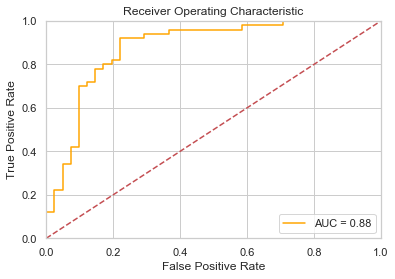

In [114]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

In [115]:
#trying with random forest
from sklearn.ensemble import RandomForestClassifier

param_grid = {"max_features": [2, 3, 5, 10, 13], "min_samples_leaf":[3, 5, 10, 20]}
nr.seed(3456)
rf_clf = RandomForestClassifier(class_weight = "balanced")
nr.seed(4455)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(features, label)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

3
20


In [116]:
import sklearn.metrics as sklm
nr.seed(1115)
rf_mod = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_mod.fit(X_train, y_train)
probabilities = rf_mod.predict_proba(X_test)
scores = score_model(probabilities, 0.54)
print_metrics(y_test, scores)     

                 Confusion matrix
                 Score positive    Score negative
Actual positive        36                 5
Actual negative        11                39

Accuracy  0.82
 
           Positive      Negative
Num case       41            50
Precision    0.77          0.89
Recall       0.88          0.78
F1           0.82          0.83


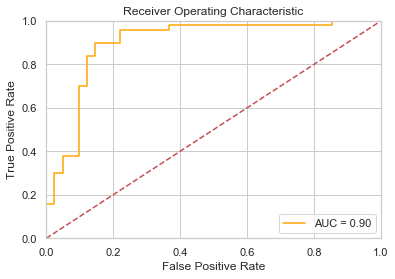

In [117]:
  plot_auc(y_test, probabilities)  

Random forest seem to do a better job than the logistic regression so in this case, the best model to use is the random forest approach
